In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image, ImageDraw, ImageFont
from tensorflow import keras
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# with open('../data/resize/X_80.pkl', 'rb') as fp:
#     X_80 = pickle.load(fp)
# with open('../data/resize/y.pkl', 'rb') as fp:
#     y = pickle.load(fp)

In [4]:
with open('/content/drive/My Drive/Data/resize/X_80.pkl', 'rb') as fp:
  X_80 = pickle.load(fp)

with open('/content/drive/My Drive/Data/resize/y.pkl', 'rb') as fp:
  y = pickle.load(fp)

In [5]:
y = np.array(pd.get_dummies(y))

In [6]:
X_80_train, X_80_test, y_train, y_test = train_test_split(X_80, y, test_size=int(len(y)*.15), random_state=42)
X_80_train, X_80_val, y_train, y_val = train_test_split(X_80_train, y_train, test_size=int(len(y)*.15), random_state=42)

In [7]:
print(len(X_80_train))
print(len(X_80_val))
print(len(X_80_test))

478426
102519
102519


In [8]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

478426
102519
102519


In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(64, (3,3), activation='relu', padding='same', input_shape=(80,80,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Convolution2D(64, (5,5), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Convolution2D(64, (5,5), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(514, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        1

In [11]:
history = model.fit(
    np.array(X_80_train).reshape(-1,80,80,1), 
    np.array(y_train), 
    epochs=10, 
    batch_size=400, 
    validation_data=(np.array(X_80_val).reshape(-1,80,80,1), y_val))

Epoch 1/10
1197/1197 [==============================] - 75s 63ms/step - loss: 1.2783 - acc: 0.7288 - val_loss: 0.5990 - val_acc: 0.8441
Epoch 2/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.3877 - acc: 0.8943 - val_loss: 0.3970 - val_acc: 0.8933
Epoch 3/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.2703 - acc: 0.9235 - val_loss: 0.3432 - val_acc: 0.9083
Epoch 4/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.2101 - acc: 0.9385 - val_loss: 0.3491 - val_acc: 0.9108
Epoch 5/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.1693 - acc: 0.9489 - val_loss: 0.3429 - val_acc: 0.9127
Epoch 6/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.1410 - acc: 0.9569 - val_loss: 0.3296 - val_acc: 0.9180
Epoch 7/10
1197/1197 [==============================] - 74s 62ms/step - loss: 0.1187 - acc: 0.9629 - val_loss: 0.3649 - val_acc: 0.9169
Epoch 8/10
1197/1197 [==========================

In [12]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

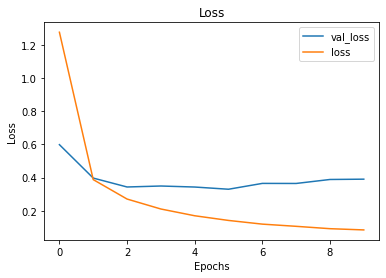

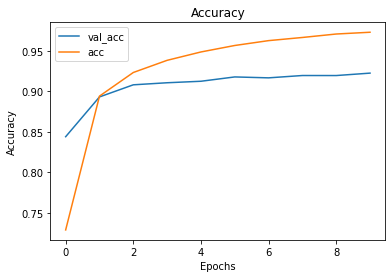

In [13]:
visualize_training_results(history)

In [14]:
yhat_test = model.predict(np.array(X_80_test).reshape(-1,80,80,1))
yhat_test[0]

array([6.39169176e-31, 1.18101580e-21, 1.17261269e-20, 7.46864231e-27,
       6.00260797e-23, 1.50276785e-26, 2.66951755e-33, 4.83569185e-13,
       2.12173063e-14, 8.46871429e-16, 2.94668363e-16, 2.03203817e-12,
       1.91476592e-11, 2.49833609e-18, 3.51752522e-14, 7.45197088e-18,
       3.76882824e-13, 1.14563957e-12, 1.94015878e-14, 3.49426552e-19,
       2.78110038e-14, 1.55241089e-20, 6.67762720e-13, 1.05406244e-20,
       1.76432976e-17, 3.92981970e-18, 3.22374472e-15, 1.66177111e-17,
       4.55411472e-19, 9.51064036e-22, 2.19774676e-17, 5.80563175e-20,
       2.02232545e-12, 1.30975021e-15, 2.26775846e-12, 6.26302992e-21,
       8.69078681e-12, 1.84350223e-16, 4.21661405e-17, 1.40778365e-18,
       5.13100166e-20, 9.45177934e-25, 1.24925406e-13, 6.44029372e-14,
       6.76167132e-15, 2.24321362e-14, 5.05074599e-14, 1.81659604e-10,
       4.87774214e-15, 3.31651604e-20, 6.09802769e-28, 1.25335855e-14,
       8.64436724e-19, 4.44389995e-13, 1.02876440e-15, 5.28204043e-11,
      